### **Import Libraries & Setup**

In [98]:
# Import Library 
import pandas as pd
import numpy as np
from config.setting import REQ_PATH

### **Data Ingestion**

In [99]:
# Ingest data dari 'REQ_PATH'
requirement_df_original = pd.read_csv(REQ_PATH)

# Membuat Staging Area
df_req = requirement_df_original.copy()
df_req.drop(columns='Unnamed: 0', inplace=True)

# Preview data
df_req.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue,dates
0,PCS Global Tech\n4.7,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\n· Analyze and organize raw d...,"$70,000 /yr (est.)",501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-10:00
1,Futuretech Consultants LLC,NaN,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,$42.50 /hr (est.),NaN,NaN,NaN,NaN,NaN,NaN,2024-06-12 00:00:00+07:00
2,Clairvoyant\n4.4,4.4,Remote,Data Engineer (MDM),Required Skills:\nMust have 5-8+ Years of expe...,$67.50 /hr (est.),51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-10:00
3,Apple\n4.2,4.2,"Cupertino, CA",Data Engineer,"Summary\nPosted: Dec 22, 2021\nWeekly Hours: 4...",NaN,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,1976.0,$10+ billion (USD),2024-06-12 00:00:00-05:00
4,Skytech Consultancy Services\n5.0,5.0,"Baltimore, MD",Data Engineer,Description of Work:\nTechnical experience in ...,$65.00 /hr (est.),1 to 50 Employees,Company - Public,NaN,NaN,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-04:00


### **Data Overview**

In [100]:
# Menampilkan nama kolom di Dataset 'df_req'
df_req.columns

Index(['company', 'company_rating', 'location', 'job_title', 'job_description',
       'salary_estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'company_revenue', 'dates'],
      dtype='object')

In [101]:
# Menampilkan ringkasan informasi Dataset 'df_req'
df_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1551 non-null   object 
 1   company_rating    1358 non-null   float64
 2   location          1554 non-null   object 
 3   job_title         1554 non-null   object 
 4   job_description   1554 non-null   object 
 5   salary_estimate   1277 non-null   object 
 6   company_size      1442 non-null   object 
 7   company_type      1442 non-null   object 
 8   company_sector    1260 non-null   object 
 9   company_industry  1260 non-null   object 
 10  company_founded   1131 non-null   float64
 11  company_revenue   1442 non-null   object 
 12  dates             1555 non-null   object 
dtypes: float64(2), object(11)
memory usage: 158.1+ KB


In [102]:
# Mengecek Missing values per kolom
df_req.isnull().sum()

company               4
company_rating      197
location              1
job_title             1
job_description       1
salary_estimate     278
company_size        113
company_type        113
company_sector      295
company_industry    295
company_founded     424
company_revenue     113
dates                 0
dtype: int64

In [103]:
# Preview 10 data baris awal
df_req.head(10)

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue,dates
0,PCS Global Tech\n4.7,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\n· Analyze and organize raw d...,"$70,000 /yr (est.)",501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-10:00
1,Futuretech Consultants LLC,NaN,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,$42.50 /hr (est.),NaN,NaN,NaN,NaN,NaN,NaN,2024-06-12 00:00:00+07:00
2,Clairvoyant\n4.4,4.4,Remote,Data Engineer (MDM),Required Skills:\nMust have 5-8+ Years of expe...,$67.50 /hr (est.),51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-10:00
3,Apple\n4.2,4.2,"Cupertino, CA",Data Engineer,"Summary\nPosted: Dec 22, 2021\nWeekly Hours: 4...",NaN,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,1976.0,$10+ billion (USD),2024-06-12 00:00:00-05:00
4,Skytech Consultancy Services\n5.0,5.0,"Baltimore, MD",Data Engineer,Description of Work:\nTechnical experience in ...,$65.00 /hr (est.),1 to 50 Employees,Company - Public,NaN,NaN,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-04:00
5,Jane Street\n4.4,4.4,"New York, NY",Data Engineer,About the Position\nWe are looking for a Data ...,"$237,500 /yr (est.)",1001 to 5000 Employees,Company - Private,Management & Consulting,Research & Development,2000.0,Unknown / Non-Applicable,2024-06-12 00:00:00+08:00
6,Steward Health Care\n2.7,2.7,"Westwood, MA",Data Engineer,Position Purpose:\nReporting to the Manager of...,"$94,536 /yr (est.)",10000+ Employees,Hospital,Healthcare,Health Care Services & Hospitals,1998.0,Unknown / Non-Applicable,2024-06-12 00:00:00+10:00
7,"Twitch Interactive, Inc.\n3.8",3.8,"San Francisco, CA",Data Engineer,"3+ years of experience in data engineering, so...","$105,700 /yr (est.)",10000+ Employees,Company - Public,Information Technology,Internet & Web Services,1994.0,$10+ billion (USD),2024-06-12 00:00:00+08:00
8,AGM Tech Solutions\n4.8,4.8,"Alpharetta, GA",Sr. Data Engineer,Sr. Data Engineer - Alpharetta GA\nLocation: M...,$77.00 /hr (est.),51 to 200 Employees,Company - Private,Human Resources & Staffing,HR Consulting,2018.0,$5 to $25 million (USD),2024-06-12 00:00:00+07:00
9,Amazee Global Ventures Inc\n5.0,5.0,"Irving, TX",Big Data Engineer,Title: Big Data Engineer\nLocation: Irving TX ...,$62.50 /hr (est.),1 to 50 Employees,Company - Public,NaN,NaN,2019.0,Less than $1 million (USD),2024-06-12 00:00:00+08:00


In [104]:
# Preview 10 data baris akhir
df_req.tail(10)

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue,dates
1545,Amaze Systems\n5.0,5.0,"Houston, TX",Sr. Data Engineer ( W2 ONLY) (10 years of expe...,TOP SKILLS\n5+ years of experience as a Data E...,$67.50 /hr (est.),Unknown,Company - Public,Media & Communication,Advertising & Public Relations,NaN,Unknown / Non-Applicable,2024-07-01 00:00:00-04:00
1546,GlobalLogic\n3.9,3.9,"Dallas, TX",Data engineer IRC191735,Job:\nIRC191735\n\nLocation:\nUnited States - ...,"$120,462 /yr (est.)",10000+ Employees,Company - Private,Information Technology,Information Technology Support Services,2000.0,$500 million to $1 billion (USD),2024-07-01 00:00:00+10:00
1547,"Amazon Data Services, Inc.\n3.7",3.7,"Herndon, VA",Data Center Regional Mechanical Engineer (Fiel...,Bachelor’s Degree in Mechanical Engineering or...,"$101,618 /yr (est.)",10000+ Employees,Company - Public,Information Technology,Internet & Web Services,1994.0,$10+ billion (USD),2024-07-01 00:00:00-04:00
1548,Finch Computing\n3.3,3.3,"Chantilly, VA",Data Engineer - TS/SCI with Polygraph,Clearance: ** TS/SCI with POLYGRAPH REQUIRED**...,"$95,045 /yr (est.)",1 to 50 Employees,Company - Private,Information Technology,Enterprise Software & Network Solutions,2014.0,Unknown / Non-Applicable,2024-07-01 00:00:00+08:00
1549,"Amazon Data Services, Inc.\n3.7",3.7,"Austin, TX","Electrical Design Engineer, Data Center Design...",Bachelor’s degree in an electrical engineering...,"$77,300 /yr (est.)",10000+ Employees,Company - Public,Information Technology,Internet & Web Services,1994.0,$10+ billion (USD),2024-07-01 00:00:00+08:00
1550,Paycom\n3.5,3.5,"Oklahoma City, OK",Sr. Data Engineer,This position will be located within the Devel...,"$90,582 /yr (est.)",1001 to 5000 Employees,Company - Public,Information Technology,Enterprise Software & Network Solutions,1998.0,$1 to $5 billion (USD),2024-07-01 00:00:00+08:00
1551,"Amazon Data Services, Inc.\n3.7",3.7,"Hermiston, OR",Data Center Regional Electrical Engineer (Fiel...,Bachelor’s Degree in Electrical Engineering or...,"$105,893 /yr (est.)",10000+ Employees,Company - Public,Information Technology,Internet & Web Services,1994.0,$10+ billion (USD),2024-07-01 00:00:00-05:00
1552,Palo Alto Networks\n4.2,4.2,"Santa Clara, CA","Sr Principal Data Software Engineer (SASE, Cloud)",Company Description\n\nOur Mission\nAt Palo Al...,"$188,700 /yr (est.)",10000+ Employees,Company - Public,Information Technology,Enterprise Software & Network Solutions,2005.0,$1 to $5 billion (USD),2024-07-01 00:00:00+01:00
1553,Talent Groups,NaN,Remote,"Fulltime // Data Engineer (H4 EADs, L2 EADs, G...",Position: Data engineer (Live Table Structured...,"$130,000 /yr (est.)",Unknown,Company - Private,Human Resources & Staffing,Staffing & Subcontracting,NaN,Unknown / Non-Applicable,2024-07-01 00:00:00-10:00
1554,Gainwell Technologies LLC\n3.4,3.4,"Roseville, CA","Cloud Data Engineer - Hybrid - Roseville, CA",Be part of a team that unleashes the power of ...,"$98,850 /yr (est.)",10000+ Employees,Company - Private,Information Technology,Information Technology Support Services,2020.0,Unknown / Non-Applicable,2024-07-01 00:00:00+10:00


### **Data Cleaning & Handling Missing**


Tahap ini dilakukan untuk memastikan kualitas data sebelum analisis. Proses meliputi pembersihan nilai tidak valid, penanganan data yang hilang, serta standarisasi format agar lebih konsisten. Dengan data yang bersih, hasil analisis akan lebih akurat dan dapat diandalkan.

In [105]:
# Preview kolom sebelum transformasi
df_req['company'].unique()

array(['PCS Global Tech\n4.7', 'Futuretech Consultants LLC',
       'Clairvoyant\n4.4', ..., 'Paycom\n3.5', 'Talent Groups',
       'Gainwell Technologies LLC\n3.4'], shape=(1237,), dtype=object)

Pada tahap data profiling, ditemukan bahwa kolom `company` memiliki format yang tidak seragam. Beberapa nilai mengandung nama perusahaan + rating dalam satu string, misalnya:

- "PCS Global Tech\n4.7 "  
- "Clairvoyant\n4.4"  
- "Futuretech Consultants LLC"  

Ketidakkonsistenan ini bisa menimbulkan masalah saat analisis, karena sistem akan membaca "PCS Global Tech\n4.7" sebagai entitas berbeda dari "PCS Global Tech".  

In [106]:
# Hapus baris dengan nilai kosong pada kolom 'company'
df_req.dropna(subset=['company'], inplace=True)

# Hapus baris dengan nilai kosong pada kolom 'company'
df_req['company'] = df_req['company'].str.replace(r'\n.*','',regex=True)
df_req['company'] = df_req['company'].str.strip()


Oleh karena itu, dilakukan proses data cleaning untuk: menghapus karakter khusus `\n`, memisahkan rating dari nama perusahaan, dan menyamakan format agar kolom `company` hanya berisi nama perusahaan. Dengan begitu, analisis seperti grouping, counting, atau join antar tabel bisa lebih akurat karena tiap perusahaan punya nama konsisten tanpa tambahan rating.


In [107]:
# preview hasil setelah transformasi
df_req['company'].unique()

array(['PCS Global Tech', 'Futuretech Consultants LLC', 'Clairvoyant',
       ..., 'Paycom', 'Talent Groups', 'Gainwell Technologies LLC'],
      shape=(1192,), dtype=object)

Kolom `location` yang berisi gabungan kota dan negara bagian dipisahkan menjadi dua kolom baru: `city` dan `state` menggunakan fungsi `str.split()`. Pemisahan ini memudahkan analisis berdasarkan wilayah.


In [108]:
# Pisahin kolom 'location' jadi 'city' & 'state'
df_req[['city','state']] = df_req['location'].str.split(",", n=1, expand=True)
df_req = df_req.drop(columns=['location'])

Kolom `dates` diubah ke tipe datetime dengan format UTC, lalu diseragamkan ke timezone `America/New_York` karena dataset berasal dari Amerika.


In [109]:
# Konversi kolom 'dates' jadi tipe datetime
df_req['dates'] = pd.to_datetime(df_req['dates'],utc=True)

# sesuaikan semua Format timezone ke America/New_York (karena kolom salary USD)
df_req['dates'] = df_req['dates'].dt.tz_convert('America/New_York')


Kolom `salary_estimate` dibersihkan dengan menghapus string tambahan seperti `(est.)`, lalu dikonversi menjadi gaji bulanan (USD) menggunakan fungsi `get_salary_month`.


In [110]:
# Bersihkan string tambahan "(est.)" pada kolom salary agar format lebih seragam
df_req['salary_estimate'] = df_req['salary_estimate'].str.replace(r'\(.*','',regex= True)

Fungsi `get_salary_month` digunakan untuk mengonversi berbagai format gaji (`per year`, `per month`, `per hour`) menjadi gaji bulanan (USD).  
Langkah kerjanya:
- Menghapus simbol `$` dan koma.  
- Mengecek satuan gaji berdasarkan mapping (`/year`, `/month`, `/hour`).  
- Mengubah nilai:
  - **Yearly** → dibagi 12  
  - **Monthly** → langsung dipakai  
  - **Hourly** → dikali 173 (rata-rata jam kerja per bulan di AS)  
- Jika nilai kosong atau format tidak valid, hasilnya `NaN`.

In [111]:
# Fungsi konversi salary dari berbagai unit (year, month, hour) ke monthly salary (USD)
def get_salary_month(salary):
    # Mapping satuan gaji
    unit_map = {
        'year' : ['/year','/yr'],
        'month' : ['/month','/mo'],
        'hour' : ['/hour','/hr']
    }
    
    # Jika salary kosong / NaN, return NaN
    if pd.isnull(salary):
        return np.nan
    
    s = salary.replace('$','').replace(',','')
    
    # Loop cek setiap unit (year, month, hour) dan aliasnya
    for unit, x in unit_map.items():
        if any(alias in s for alias in x):
            for alias in x:
                s = s.replace(alias,'')
            try:
                value = float(s)
            except ValueError:
                return np.nan
            
            # Konversi ke monthly salary
            if unit == "year":
                salary = value / 12
                return round(salary,2)
            elif unit == "month":
                salary = value
                return round(salary,2)
            elif unit == "hour":
                salary = value * 173 # rata2 jam kerja di us dalam 1 bulan
                return round(salary,2)
    
    return np.nan            

Fungsi `get_salary_month` diterapkan ke kolom `salary_estimate` dengan `.apply()`, sehingga seluruh nilai langsung dikonversi ke gaji bulanan.

In [112]:
# Terapkan fungsi 'get_salary_month'
df_req['salary_estimate'] = df_req['salary_estimate'].apply(get_salary_month)

Mengisi missing values pada kolom company_size, company_revenue, dan company_type dengan kategori "Unknown" agar data tetap konsisten dan tidak hilang saat analisis.

In [113]:
# Isi missing values dengan kategori "Unknown"
df_req['company_size'] = df_req['company_size'].fillna('Unknown')
df_req['company_revenue'] =  df_req['company_revenue'].fillna('Unknown / Non-Applicable')
df_req['company_type'] =  df_req['company_type'].fillna('Unknown')

In [114]:
# Preview hasil akhir
df_req.head(10)

,company,company_rating,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue,dates,city,state
0,PCS Global Tech,4.7,Data Engineer | PAID BOOTCAMP,Responsibilities\n· Analyze and organize raw d...,5833.33,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,NaN,Unknown / Non-Applicable,2024-06-12 06:00:00-04:00,Riverside,CA
1,Futuretech Consultants LLC,NaN,Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,7352.50,Unknown,Unknown,NaN,NaN,NaN,Unknown / Non-Applicable,2024-06-11 13:00:00-04:00,Newton,MS
2,Clairvoyant,4.4,Data Engineer (MDM),Required Skills:\nMust have 5-8+ Years of expe...,11677.50,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,NaN,Unknown / Non-Applicable,2024-06-12 06:00:00-04:00,Remote,None
3,Apple,4.2,Data Engineer,"Summary\nPosted: Dec 22, 2021\nWeekly Hours: 4...",NaN,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,1976.0,$10+ billion (USD),2024-06-12 01:00:00-04:00,Cupertino,CA
4,Skytech Consultancy Services,5.0,Data Engineer,Description of Work:\nTechnical experience in ...,11245.00,1 to 50 Employees,Company - Public,NaN,NaN,NaN,Unknown / Non-Applicable,2024-06-12 00:00:00-04:00,Baltimore,MD
5,Jane Street,4.4,Data Engineer,About the Position\nWe are looking for a Data ...,19791.67,1001 to 5000 Employees,Company - Private,Management & Consulting,Research & Development,2000.0,Unknown / Non-Applicable,2024-06-11 12:00:00-04:00,New York,NY
6,Steward Health Care,2.7,Data Engineer,Position Purpose:\nReporting to the Manager of...,7878.00,10000+ Employees,Hospital,Healthcare,Health Care Services & Hospitals,1998.0,Unknown / Non-Applicable,2024-06-11 10:00:00-04:00,Westwood,MA
7,"Twitch Interactive, Inc.",3.8,Data Engineer,"3+ years of experience in data engineering, so...",8808.33,10000+ Employees,Company - Public,Information Technology,Internet & Web Services,1994.0,$10+ billion (USD),2024-06-11 12:00:00-04:00,San Francisco,CA
8,AGM Tech Solutions,4.8,Sr. Data Engineer,Sr. Data Engineer - Alpharetta GA\nLocation: M...,13321.00,51 to 200 Employees,Company - Private,Human Resources & Staffing,HR Consulting,2018.0,$5 to $25 million (USD),2024-06-11 13:00:00-04:00,Alpharetta,GA
9,Amazee Global Ventures Inc,5.0,Big Data Engineer,Title: Big Data Engineer\nLocation: Irving TX ...,10812.50,1 to 50 Employees,Company - Public,NaN,NaN,2019.0,Less than $1 million (USD),2024-06-11 12:00:00-04:00,Irving,TX


## **Requirement Data Demography**  

Analisis ini bertujuan untuk memahami **profil perusahaan** dalam dataset job requirements.  
Dengan memetakan demografi perusahaan, kita bisa melihat pola rekrutmen dan tren pasar tenaga kerja berdasarkan:
1. **Tipe Perusahaan**  
2. **Ukuran Perusahaan**  
3. **Sektor & Industri**  
4. **Rating & Salary**  

Insight dari analisis ini bisa menjadi dasar untuk strategi karier maupun rekomendasi bisnis.

**Company Type Distribution**

In [122]:
df_req['company_type'].value_counts()

company_type
Company - Private                 726
Company - Public                  562
Unknown                           124
Nonprofit Organization             46
Subsidiary or Business Segment     32
College / University               15
Government                         15
Contract                           12
Private Practice / Firm            10
Hospital                            5
Self-employed                       3
School / School District            1
Name: count, dtype: int64

Mayoritas perusahaan dalam dataset adalah Private Company dan Public Company. Hal ini menunjukkan bahwa sektor swasta menjadi sumber utama permintaan tenaga kerja karena lebih dinamis dan sering membuka lowongan.

**Company Size Distribution**

In [123]:
df_req['company_size'].value_counts()

company_size
10000+ Employees           433
51 to 200 Employees        221
Unknown                    205
1001 to 5000 Employees     203
1 to 50 Employees          199
201 to 500 Employees       138
501 to 1000 Employees       85
5001 to 10000 Employees     67
Name: count, dtype: int64

Menganalisis sektor perusahaan dan industri terkait, terutama dari segi rata-rata gaji dan rating karyawan.

In [124]:
# rata-rata rating 'company_rating' by sektor
(
    df_req.groupby("company_sector")
        .agg(avg_rating=("company_rating","mean"))
        .sort_values("avg_rating",ascending=False)
        .round(1)
)

,avg_rating
company_sector,
Human Resources & Staffing,4.2
Hotels & Travel Accommodation,4.1
Information Technology,4.0
"Arts, Entertainment & Recreation",4.0
Aerospace & Defense,4.0
Education,3.9
Real Estate,3.9
Pharmaceutical & Biotechnology,3.8
Management & Consulting,3.8


In [125]:
# rata-rata 'salary' by Industry
(
    df_req.groupby("company_sector")
        .agg(avg_salary=("salary_estimate","mean"))
        .sort_values("avg_salary",ascending=False)
        .head(20).round(2)
)

,avg_salary
company_sector,
Telecommunications,11862.98
Hotels & Travel Accommodation,11239.58
Information Technology,10480.41
Human Resources & Staffing,10171.09
Management & Consulting,10112.74
Pharmaceutical & Biotechnology,9912.91
Media & Communication,9879.17
Aerospace & Defense,9428.79
Restaurants & Food Service,9425.49


**Company Rating & Salary Correlation**

kita akan menganalisis hubungan antara **rating perusahaan** dengan **estimasi gaji bulanan**.  
Tujuannya adalah untuk melihat apakah perusahaan dengan kompensasi tinggi juga memberikan tingkat kepuasan karyawan yang tinggi, atau justru ada **trade-off** antara keduanya.

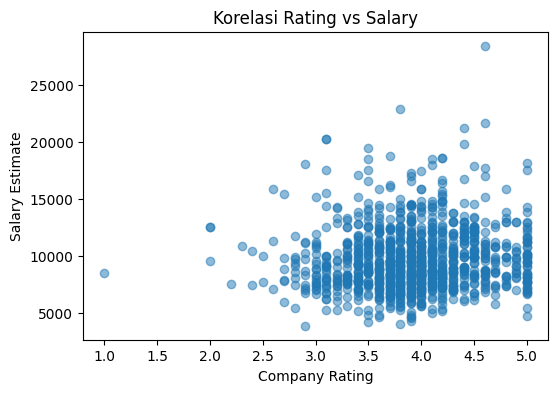

In [127]:
import matplotlib.pyplot as plt

# Membuat canvas plot dengan ukuran 6x4
plt.figure(figsize=(6,4))

# Membuat scatter plot: sumbu X = rating perusahaan, sumbu Y = estimasi gaji
plt.scatter(
    df_req['company_rating'],   # nilai rating perusahaan
    df_req['salary_estimate'],  # estimasi gaji bulanan
    alpha=0.5                   # transparansi titik agar lebih mudah dibaca
)

# Menambahkan judul dan label sumbu
plt.title("Korelasi Rating vs Salary")
plt.xlabel("Company Rating")
plt.ylabel("Salary Estimate")

# Menampilkan plot
plt.show()


dari Analisis demografi perusahaan mengungkap pola yang jelas antara **sektor bisnis, kompensasi, dan kepuasan karyawan**:

- **Finance & Technology** → konsisten menawarkan kompensasi tertinggi, terutama di industri seperti *Investment Banking* dan *Software Services*. Namun, tingkat kepuasan karyawan cenderung rata-rata, menandakan adanya tekanan kerja atau ekspektasi tinggi.  
- **Healthcare & Education** → menunjukkan tren sebaliknya. Walaupun kompensasi lebih moderat, tingkat **kepuasan karyawan relatif lebih tinggi**, dipengaruhi faktor non-finansial seperti *purpose-driven work*, stabilitas, dan budaya kerja.  

Korelasi antara **salary dan rating** menegaskan adanya **trade-off**: gaji tinggi tidak selalu berbanding lurus dengan kepuasan, dan sebaliknya. Kandidat perlu menimbang prioritas — apakah mengejar **financial reward** (Finance/Tech) atau **work-life balance & satisfaction** (Healthcare/Education).  
Secara keseluruhan, **daya tarik perusahaan tidak hanya ditentukan oleh kompensasi**, tetapi juga oleh kualitas lingkungan kerja. Employer branding yang efektif harus menyeimbangkan keduanya agar dapat menarik sekaligus mempertahankan talenta terbaik.  
